# Data Analytics project
In this notebook, we will be analyzing e-commerce data.

### Necessary Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Reading and understanding our data

In [5]:
df = pd.read_csv('Pakistan Largest Ecommerce Dataset copy.csv')
df.head()

/var/folders/jr/8csc44ss5tzfrxgk412jzk8m0000gn/T/ipykernel_22100/659348981.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Pakistan Largest Ecommerce Dataset copy.csv')


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

### Handling the missing values

Find the list of variables with missing data and number of missing values

In [5]:
df.isnull().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601229
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

In [6]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


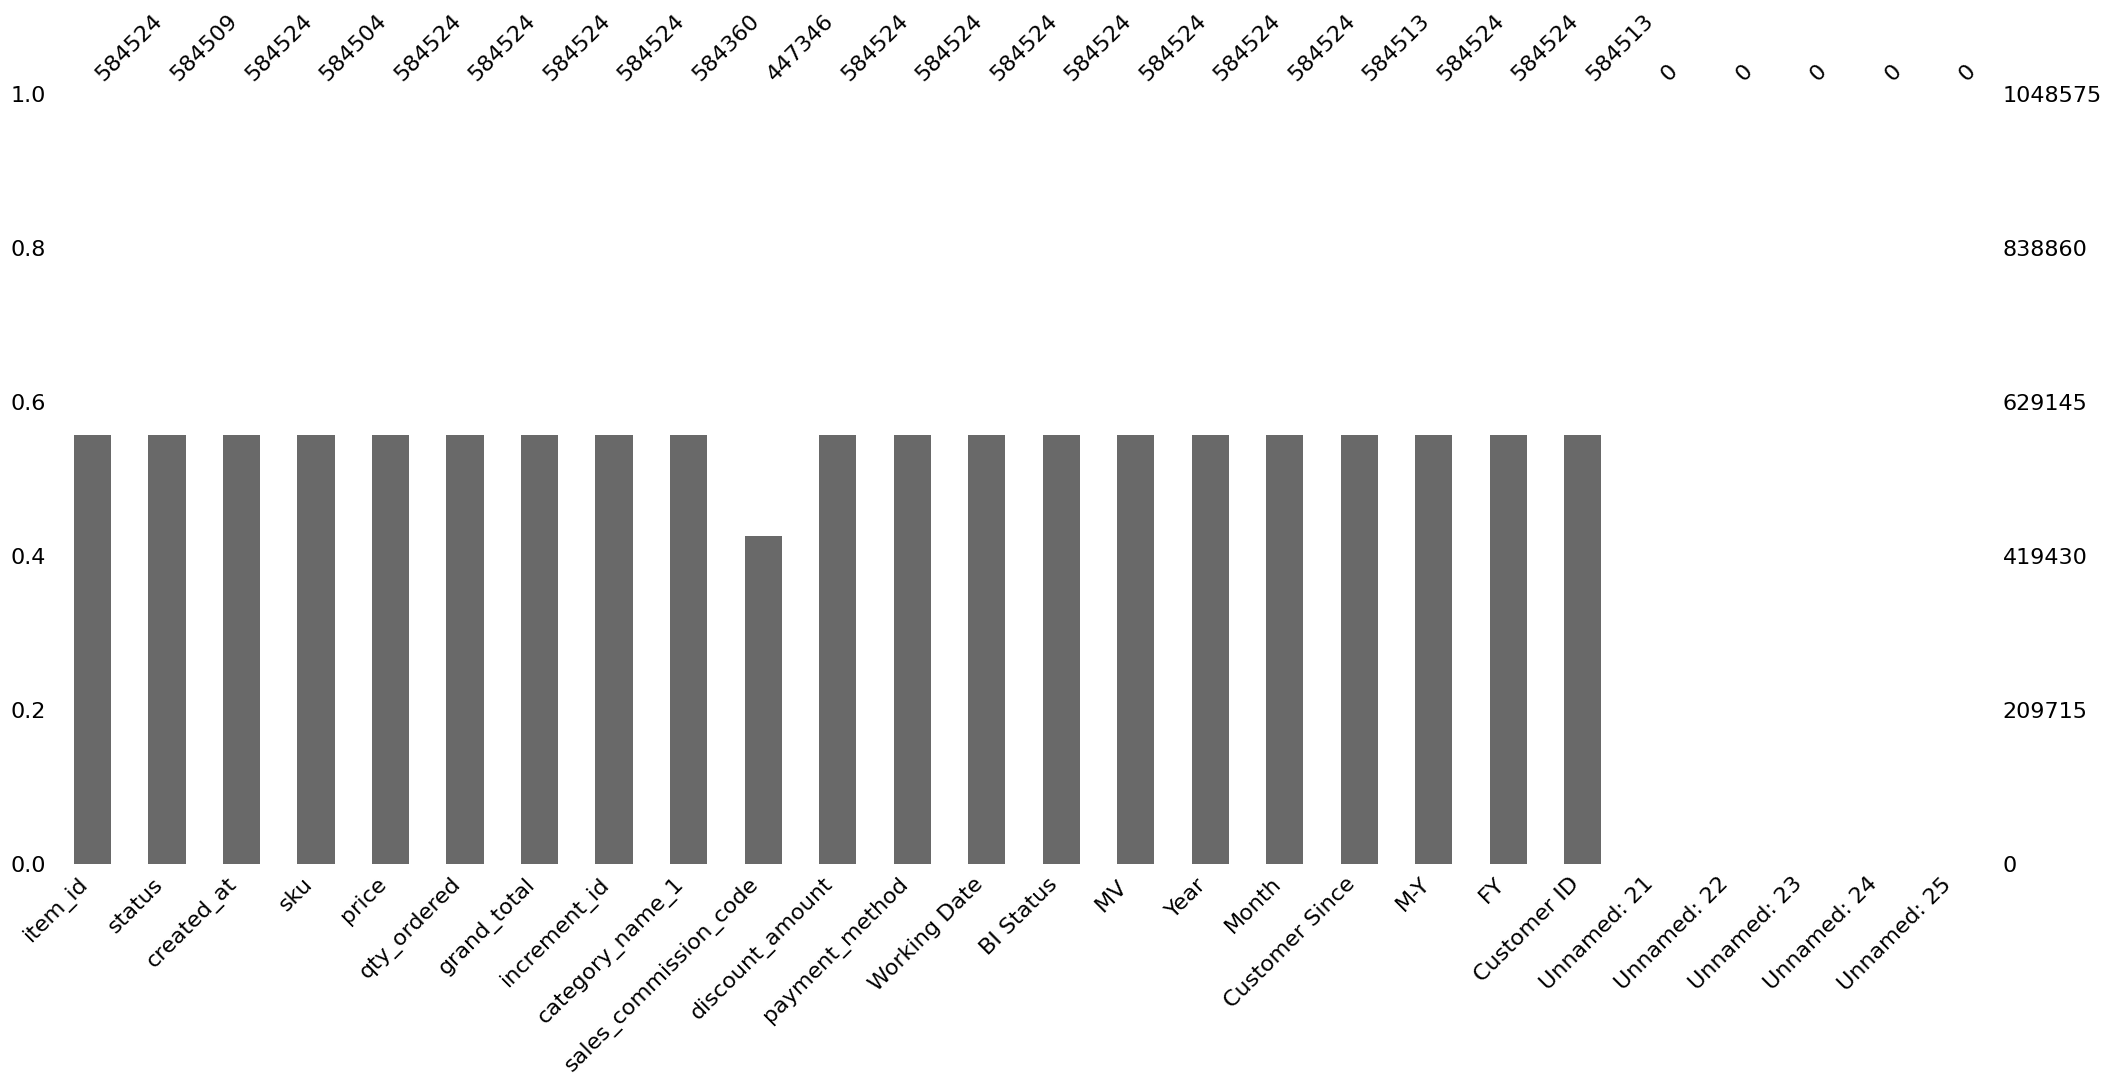

In [7]:
import missingno as msno



msno.bar(df)
plt.show()

As we can notice we have multiple features that has no values for example the following one:
- Unnamed: 21
- Unnamed: 22
- Unnamed: 23
- Unnamed: 24
- Unnamed: 25


Also we can see that multiple row of the data doesn't have any value "NaN", we will also remove them

we will proceed by removing these columns first, then we will handle the missing values for the other columns

In [8]:
df.drop(columns=["Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"], inplace=True)
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


In [9]:
df.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.dropna(how='all', inplace=True)

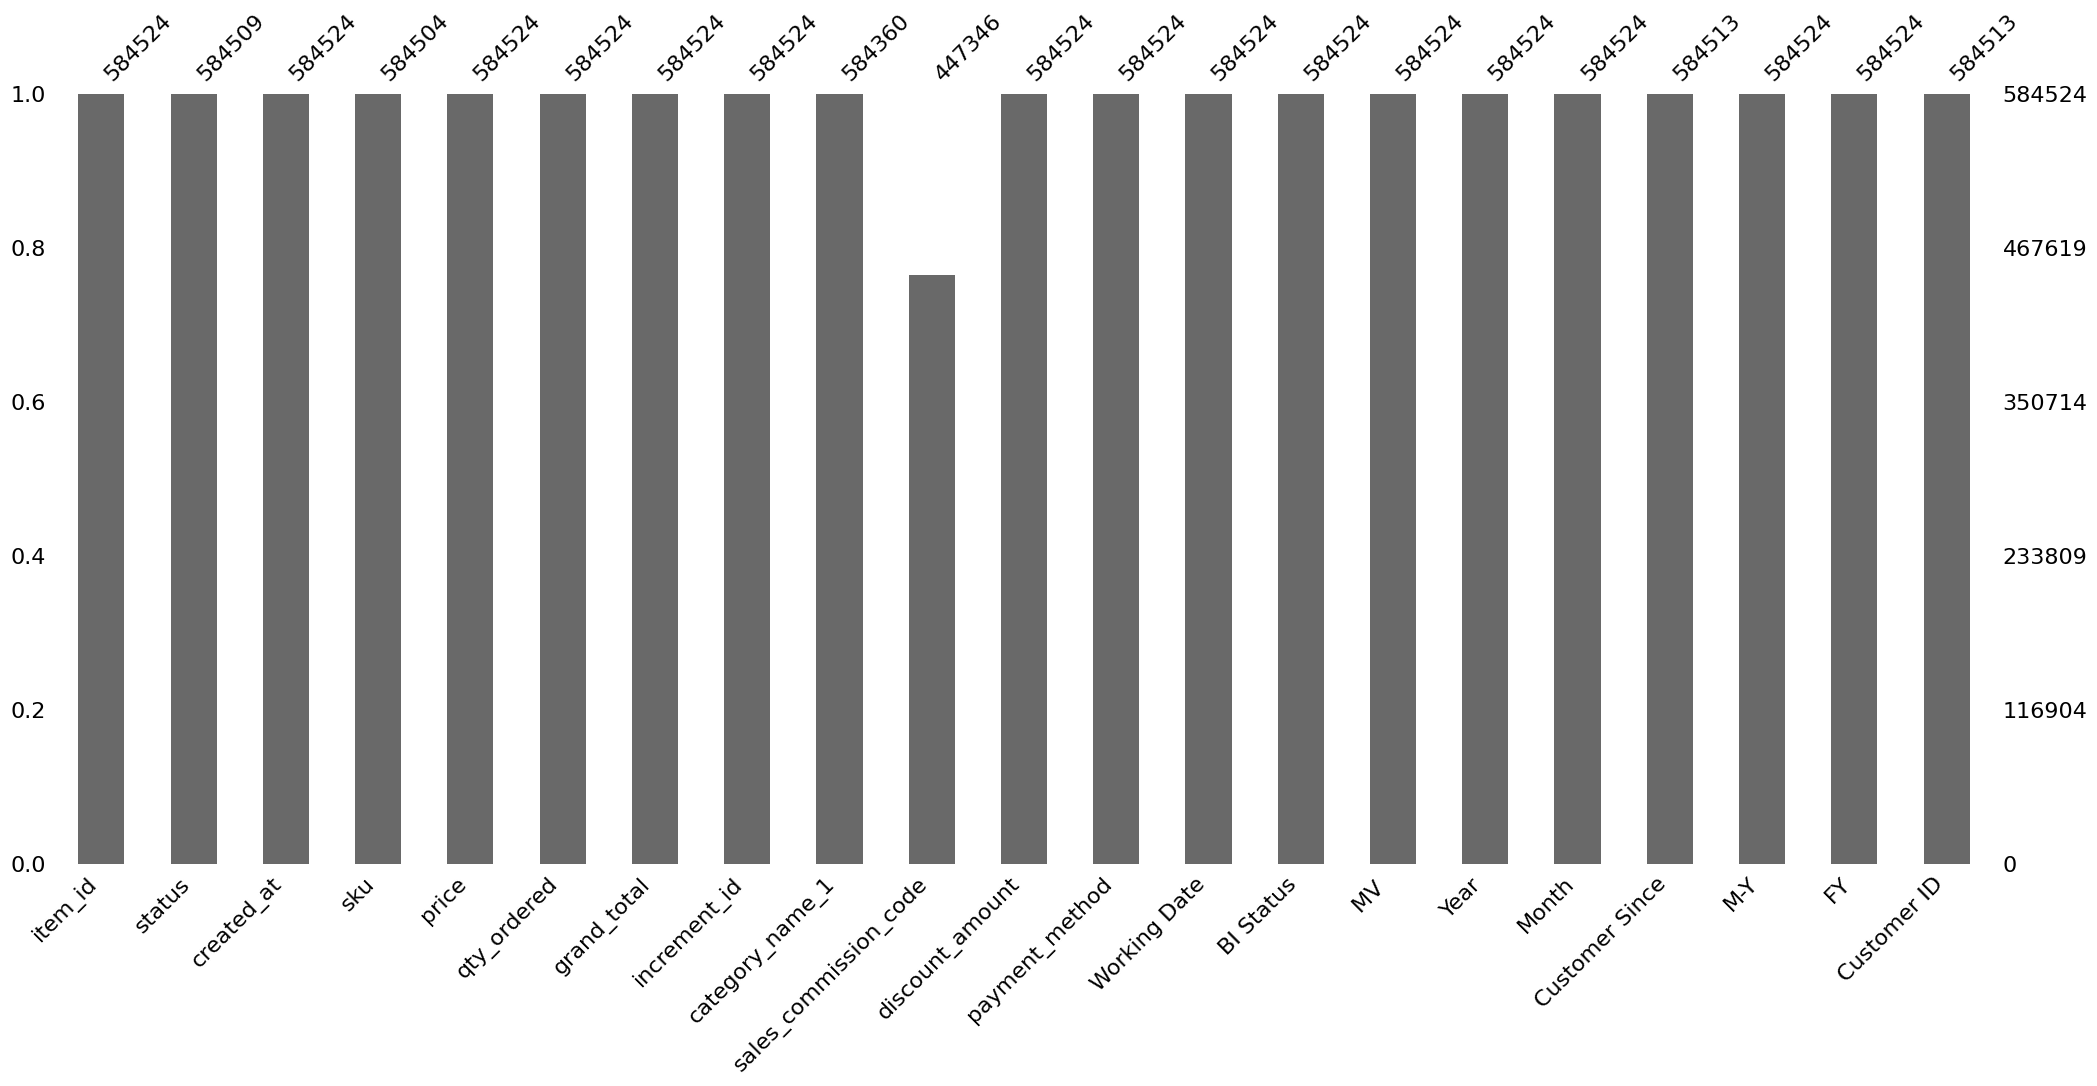

In [11]:
import missingno as msno



msno.bar(df)
plt.show()

 - now that handled the large amount ou missing values, let's check if we have any other missing values left in our data, then we will proceed how handle them

Let's fill some null rows with mode value of a column

In [12]:
# Compute missing values percentage
missing_df = df.isnull().sum().reset_index()
missing_df.columns = ["Column", "Missing Count"]
missing_df["Total Rows"] = len(df)
missing_df["Missing Percentage"] = (missing_df["Missing Count"] / len(df)) * 100

# Display the missing values summary
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Missing Values Summary", dataframe=missing_df)

Missing Values Summary


- we still have some missing values in our data in the following feature

    - **status**
    - **sku**
    - **category_name_1**
    - **sales_commission_code**
    - **Customer Since** 
    - **Customer ID**

since only **category_name_1** has an important rate of missing values **23.46%**, we will work replace them with the most fraquent value in this particular column, this by using mode

In [13]:
df["category_name_1"].fillna(df["category_name_1"].mode()[0], inplace=True)

/tmp/ipykernel_283527/2454275032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["category_name_1"].fillna(df["category_name_1"].mode()[0], inplace=True)


Since the missing values are very low (0.002% - 0.028%), dropping affected rows is an easy fix:

In [14]:
df.dropna(inplace=True)

Now we can check if still have any missing values left in our data

In [15]:
df.isnull().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

### Preparing the Data

- Convert Date Columns to Datetime Format

In [15]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["Working Date"] = pd.to_datetime(df["Working Date"])
df["Customer Since"] = pd.to_datetime(df["Customer Since"])


This converts the columns **created_at**, **Working Date**, and **Customer Since** into datetime format. This is essential for performing any time-based analysis, such as sorting, filtering, or extracting date components.

Replace #REF! with NaN in column "BI Status"



In [30]:
df['BI Status'] = df['BI Status'].replace('#REF!', np.nan)
index_to_drop = df['BI Status'].isna().idxmax()
df = df.drop(index=index_to_drop)

In [31]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
5,211137.0,canceled,7/1/2016,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,100147448,Soghaat,\N,0.0,cod,7/1/2016,Gross,80,2016.0,7.0,2016-7,7-2016,FY17,6.0,NaN,NaN,NaN,NaN,NaN


### Best Selling Category Year-Wise Analysis

In this Part, we will analyze the best-selling product categories over different years.
We will perform data wrangling to aggregate sales by category and year, then visualize the trends.

In [6]:
E2 = df[['payment_method', 'Year', 'category_name_1', 'status', 'qty_ordered']]


We extract only the necessary columns for our analysis: `Year`, `category_name_1`, and `qty_ordered` to track order quantities over the years.


In [8]:
E2 = E2.groupby(['Year', 'category_name_1'])['qty_ordered'].count().reset_index()

We group the data by `Year` and `category_name_1` to count the number of orders for each category per year.


In [9]:
E2['category_name_1'] = E2['category_name_1'].replace({'\\N': 'Not Available'}).fillna('Not Available')

Any missing or unknown category names (`\N`) are replaced with `"Not Available"`, ensuring clean data.


In [10]:
E2['Total'] = E2['qty_ordered']


We define `Total` as the number of times a category was ordered to analyze the most frequently sold categories.


In [11]:
E2total = E2.groupby(['Year', 'category_name_1'])['Total'].sum().reset_index()

We sum up all orders per category and year to get the total sales count.


In [25]:
E2dast = E2total.pivot(index='category_name_1', columns='Year', values='Total').fillna(0)


We convert the data from a long format to a wide format where each column represents a year.
This helps in easy comparison across different years.

In [26]:
E2dast['Total'] = E2dast.sum(axis=1)


We compute the total number of orders for each category across all available years.


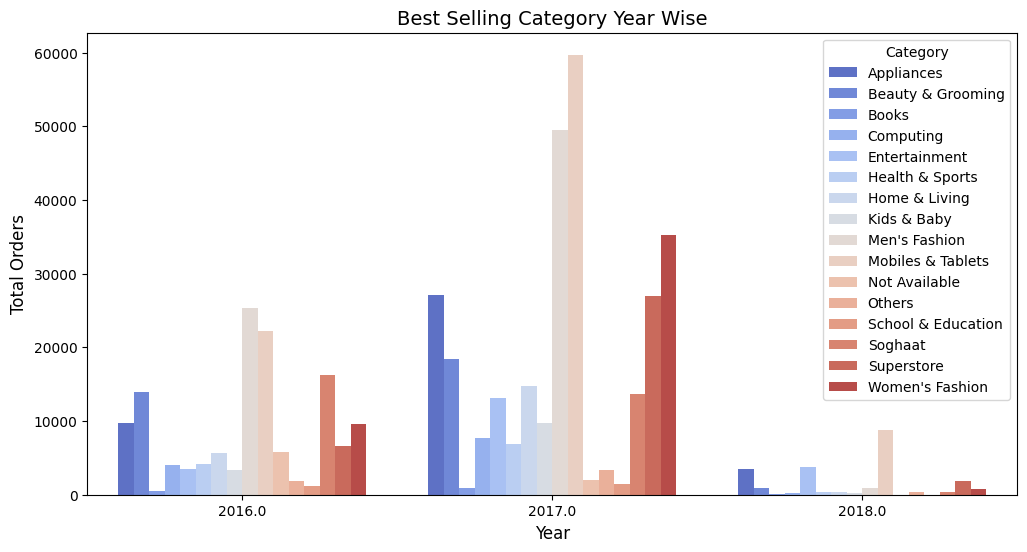

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=E2total, x='Year', y='Total', hue='category_name_1', palette='coolwarm')

plt.title("Best Selling Category Year Wise", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.legend(title="Category", bbox_to_anchor=(1, 1))

plt.show()


The chart shows the best-selling product categories across different years (2016, 2017, and 2018) based on total orders. **Men’s Fashion, Mobiles & Tablets, and Superstore** appear to be the most popular categories, with a significant increase in sales in 2017. However, sales in 2018 seem much lower, which might indicate incomplete data or a decline in orders. The variation in category sales suggests shifting customer preferences over time. A more detailed analysis could help understand the reasons behind these trends.

### Best Monthly Trend Sales and Correlation

Show Seasonal Data 

In [13]:

df['Working Date'] = pd.to_datetime(df['Working Date'], errors='coerce')
df['Year'] = df['Working Date'].dt.year
df['Month'] = df['Working Date'].dt.month
df['grand_total'] = df['grand_total'].abs()


monthly_sales = df.groupby(['Year', 'Month'])['grand_total'].sum().reset_index()
fig = px.line(
    monthly_sales, x='Month', y='grand_total', color='Year',
    title='Seasonal Trends: Monthly Sales Over Years',
    labels={'Month': 'Month', 'grand_total': 'Total Sales'}, markers=True
)
fig.update_layout(template='plotly', title_font_size=18, title_x=0.5, xaxis_title='Month', yaxis_title='Total Sales', legend_title='Year')
fig.show()




### Correlation Between Product Price and Qty Order

Create a scatter plot to visualize the correlation between product price and the quantity ordered

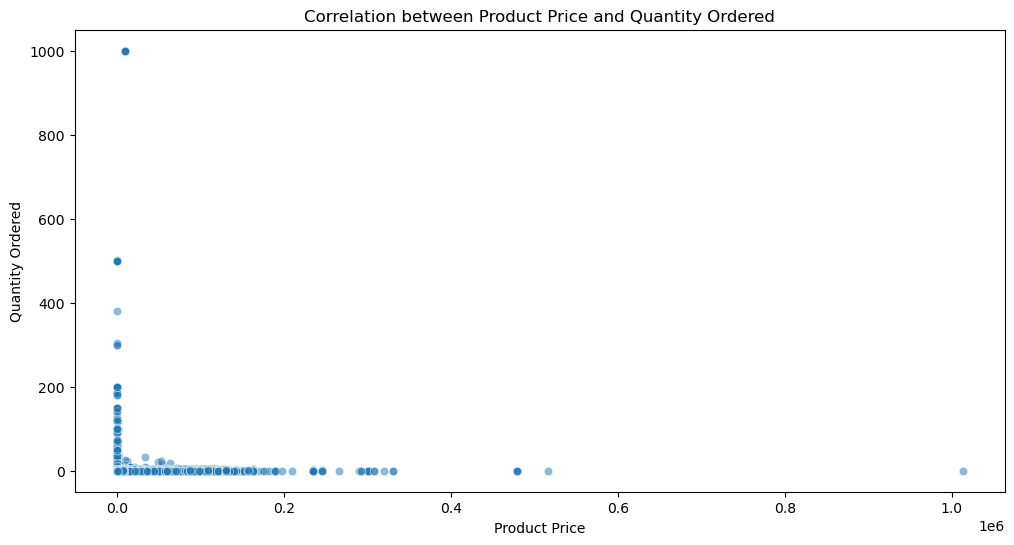

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['price'], y=df['qty_ordered'], alpha=0.5)
plt.xlabel('Product Price')
plt.ylabel('Quantity Ordered')
plt.title('Correlation between Product Price and Quantity Ordered')

plt.show()

Next calculate the Pearson correlation coefficient to quantify the strength and direction of the relationship between price and quantity ordered

In [19]:
correlation = df[['price', 'qty_ordered']].corr()
print("Correlation between Product Price and Quantity Ordered:\n", correlation)

pearson_corr, p_value = stats.pearsonr(df['price'].dropna(), df['qty_ordered'].dropna())
print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}, P-value: {p_value:.4f}")

Correlation between Product Price and Quantity Ordered:
                 price  qty_ordered
price        1.000000    -0.017629
qty_ordered -0.017629     1.000000
Pearson Correlation Coefficient: -0.0176, P-value: 0.0000


Create a regression plot to visualize how quantity ordered changes with product price

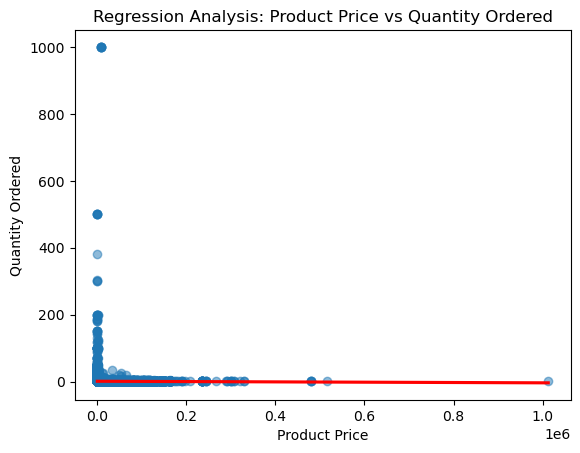

In [20]:
sns.regplot(x=df['price'], y=df['qty_ordered'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Product Price')
plt.ylabel('Quantity Ordered')
plt.title('Regression Analysis: Product Price vs Quantity Ordered')
plt.show()

Finally, check Statistical Significance

In [21]:

# if p_value < 0.05:
#     print("The correlation is statistically significant, indicating that price has an impact on quantity ordered.")
# else:
#     print("The correlation is not statistically significant, suggesting that price does not strongly influence quantity ordered.")
print(p_value)

2.0713443154115672e-41


- Since the p_value is very low, lowwer than 0.05, the correlation is statistically significant, indicating that price has an impact on quantity ordered.

### Cancellation rate by Category

We first count the number of occurrences for each unique order status in the dataset and assign it with a variable

In [30]:
order_status = df['status'].value_counts() 
print(order_status)

status
complete          205377
canceled          141434
order_refunded     48180
received           43102
refund              6366
cod                 1730
paid                 657
closed               411
payment_review        26
fraud                 10
pending                9
pending_paypal         7
holded                 6
exchange               4
\N                     4
processing             2
Name: count, dtype: int64


We create a bar chart to visualize the distribution of order statuses.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'complete'),
  Text(1, 0, 'canceled'),
  Text(2, 0, 'order_refunded'),
  Text(3, 0, 'received'),
  Text(4, 0, 'refund'),
  Text(5, 0, 'cod'),
  Text(6, 0, 'paid'),
  Text(7, 0, 'closed'),
  Text(8, 0, 'payment_review'),
  Text(9, 0, 'fraud'),
  Text(10, 0, 'pending'),
  Text(11, 0, 'pending_paypal'),
  Text(12, 0, 'holded'),
  Text(13, 0, 'exchange'),
  Text(14, 0, '\\N'),
  Text(15, 0, 'processing')])

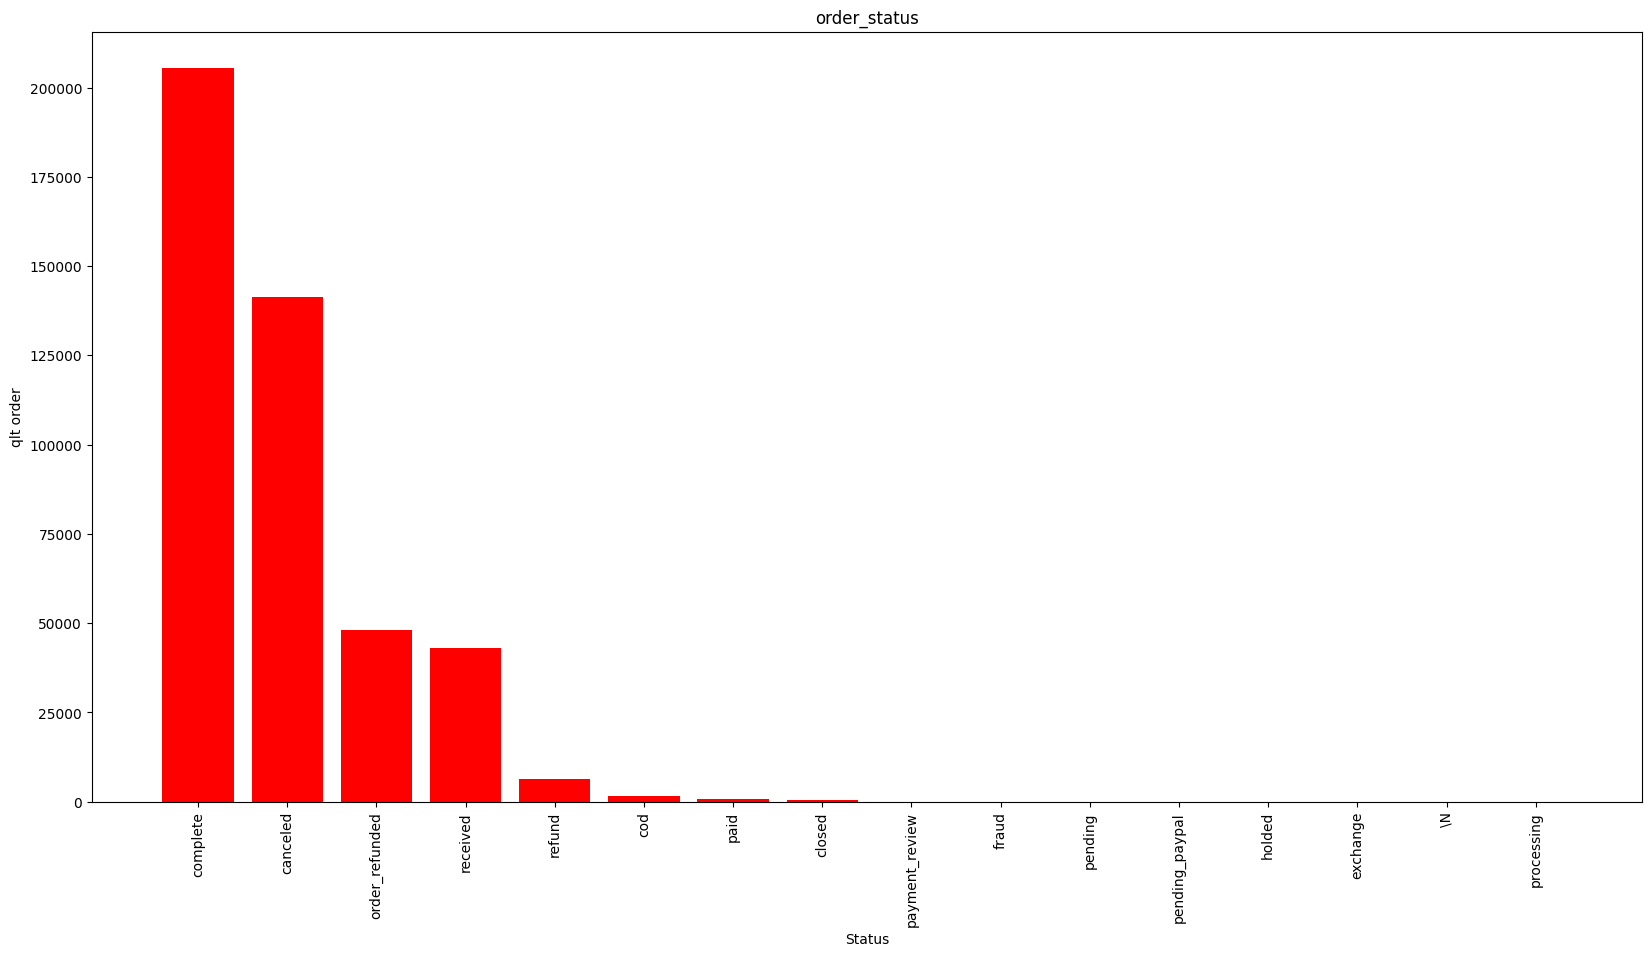

In [31]:
# Plot bar plot  
plt.figure(figsize=(20,10))
plt.bar(order_status.index, order_status, color='red')
plt.title('order_status')
plt.xlabel('Status')
plt.ylabel('qlt order')
plt.xticks( rotation=90)

Moving on, we will look specifically to the **canceled orders**. First, we filter out orders where the status is marked as 'canceled'.


In [32]:
canceled_orders = df[df['status'] == 'canceled']

We count how many orders were canceled for each product category.


In [33]:
canceled_counts = canceled_orders.groupby('category_name_1')["Customer ID"].count().to_frame("canceled count")
canceled_counts.sort_values("canceled count", ascending=False)

,canceled count
category_name_1,
Mobiles & Tablets,38885
Men's Fashion,17002
Appliances,16281
Women's Fashion,11816
Superstore,11292
Entertainment,9642
Beauty & Grooming,7394
Soghaat,6151
Home & Living,5750


Then to calculate the cancellation rate, we also need the **total number of orders per category**.

In [34]:
orders_by_category = df.groupby('category_name_1')["Customer ID"].count().to_frame("total orders")

We merge the total orders and canceled orders into one DataFrame.

In [35]:
cancellation_rate = canceled_counts.join(orders_by_category, how="inner")

We compute the percentage of orders that were canceled for each category.

In [36]:
cancellation_rate["cancellation_rate"] = (cancellation_rate["canceled count"] / cancellation_rate["total orders"] * 100).round(2)

We sort the DataFrame to see which categories have the highest return/cancellation rate then display the results

In [37]:
cancellation_rate = cancellation_rate.sort_values("cancellation_rate", ascending=False)
print(cancellation_rate)

                    canceled count  total orders  cancellation_rate
category_name_1                                                    
Entertainment                 9642         20425              47.21
Others                        2558          5518              46.36
Mobiles & Tablets            38885         90790              42.83
Computing                     5148         12038              42.76
Appliances                   16281         40274              40.43
\N                            3157          7825              40.35
Superstore                   11292         35550              31.76
Home & Living                 5750         20743              27.72
Women's Fashion              11816         45665              25.88
Kids & Baby                   3154         13377              23.58
Men's Fashion                17002         75883              22.41
Beauty & Grooming             7394         33208              22.27
Health & Sports               2500         11488

Next we create a bar chart to better understand which categories have the highest return rates.

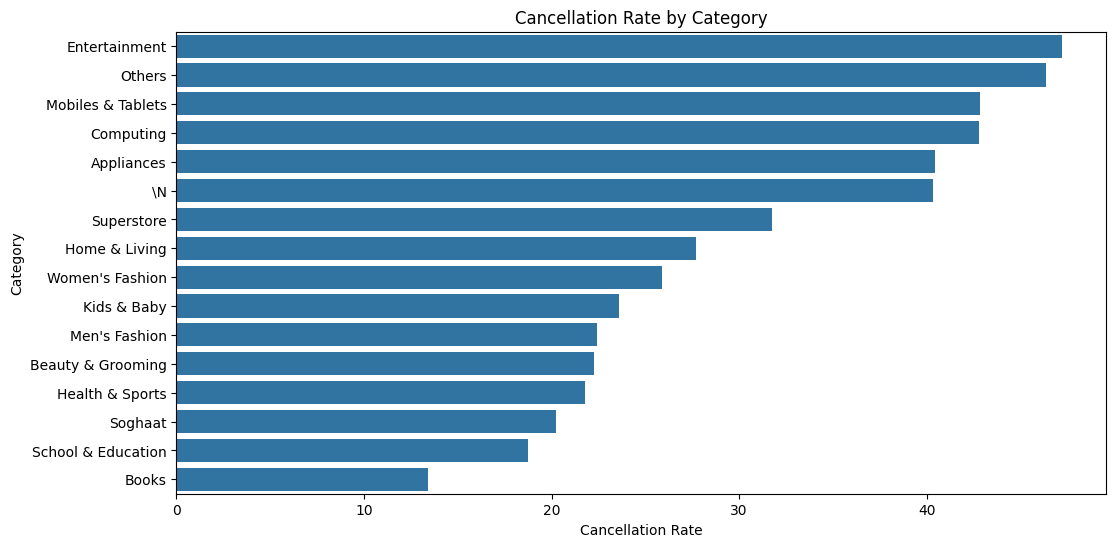

In [38]:
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(
    data=cancellation_rate.reset_index(), 
    x="cancellation_rate", 
    y="category_name_1"
)

# Add labels and title
plt.xlabel("Cancellation Rate")
plt.ylabel("Category")
plt.title("Cancellation Rate by Category")

# Show the plot
plt.show()

1. The chart shows that "Others" (60%+), "Entertainment," "Mobiles & Tablets," "Computing," and "Appliances" have the highest cancellation rates, likely due to misclassification, high-value items, or unclear descriptions. Categories like "Superstore," "Home & Living," and "Fashion" experience moderate cancellations, possibly due to fit issues, quality concerns, or changing preferences, while "Books," "Health & Sports," and "Education" have the lowest rates, indicating stable demand and clear customer expectations. 
2. **Possible solutions** could be to refine data classification, enhance buyer confidence with better product descriptions, warranties, and installment options, improve size guides and virtual try-ons, optimize logistics for faster delivery, and detect fraudulent orders by flagging frequent cancellers and requiring confirmation for high-risk purchases.

### Correlation between Payment Method and Order Status

Have an overview on the data we will work on

In [18]:
print(df["payment_method"].unique())
print(df["status"].unique())

['cod' 'ublcreditcard' 'mygateway' 'customercredit' 'cashatdoorstep'
 'mcblite' 'internetbanking' 'marketingexpense' 'productcredit'
 'financesettlement' 'Payaxis' 'jazzvoucher' 'jazzwallet' 'Easypay'
 'Easypay_MA' 'easypay_voucher' 'bankalfalah' 'apg' nan]
['complete' 'canceled' 'order_refunded' 'received' 'refund' 'closed'
 'fraud' 'holded' 'exchange' 'pending_paypal' 'paid' '\\N' 'cod' 'pending'
 nan 'processing' 'payment_review']


Before analyzing the data, we need to clean and standardize the payment method and order status columns

In [ ]:
# Mapping payment methods
payment_mapping = {
    'apg': 'APG', 'bankalfalah': 'Bank Alfalah', 'cashatdoorstep': 'Cash on Delivery',
    'cod': 'Cash on Delivery', 'customercredit': 'Customer Credit', 'Easypay': 'Easy Pay',
    'Easypay_MA': 'Easy Pay MA', 'easypay_voucher': 'Easy Pay Voucher', 
    'financesettlement': 'Finance Settlement', 'internetbanking': 'Internet Banking',
    'jazzvoucher': 'Jazz Voucher', 'jazzwallet': 'Jazz Wallet', 'marketingexpense': 'Marketing Expense',
    'mcblite': 'MCB Lite', 'mygateway': 'My Gateway', 'Payaxis': 'Pay Axis',
    'productcredit': 'Product Credit', 'ublcreditcard': 'UBL Credit Card'
}

df['payment_method'] = df['payment_method'].replace(payment_mapping)

# Mapping order statuses
status_mapping = {
    '\\N': 'Not Available', 'order_refunded': 'Order Refunded', 'pending_paypal': 'Pending Paypal',
    'payment_review': 'Payment Review', 'cod': 'Cash on Delivery', 'cashatdoorstep': 'Cash on Delivery',
    'canceled': 'Canceled', 'closed': 'Closed', 'complete': 'Complete', 'exchange': 'Exchange',
    'fraud': 'Fraud', 'holded': 'Holded', 'paid': 'Paid', 'pending': 'Pending', 'processing': 'Processing',
    'received': 'Received', 'refund': 'Refund'
}

df['status'] = df['status'].replace(status_mapping)

Next organize and aggregate the data for analysis.

In [ ]:
# Grouping data and calculating totals
df_grouped = df.groupby(['Year', 'qty_ordered', 'payment_method', 'status']).size().reset_index(name='Total')
df_grouped['Total'] = df_grouped['Total'] * df_grouped['qty_ordered']

# Aggregating totals
df_total = df_grouped.groupby(['payment_method', 'status'])['Total'].sum().reset_index()

Create Pivot table for better visualization


In [32]:
E4_pivot = df_total.pivot(index='payment_method', columns='status', values='Total').fillna(0)
E4_pivot['Total'] = E4_pivot.sum(axis=1)

Lastly, Plotting the Heatmap and Customizing the titles and labels

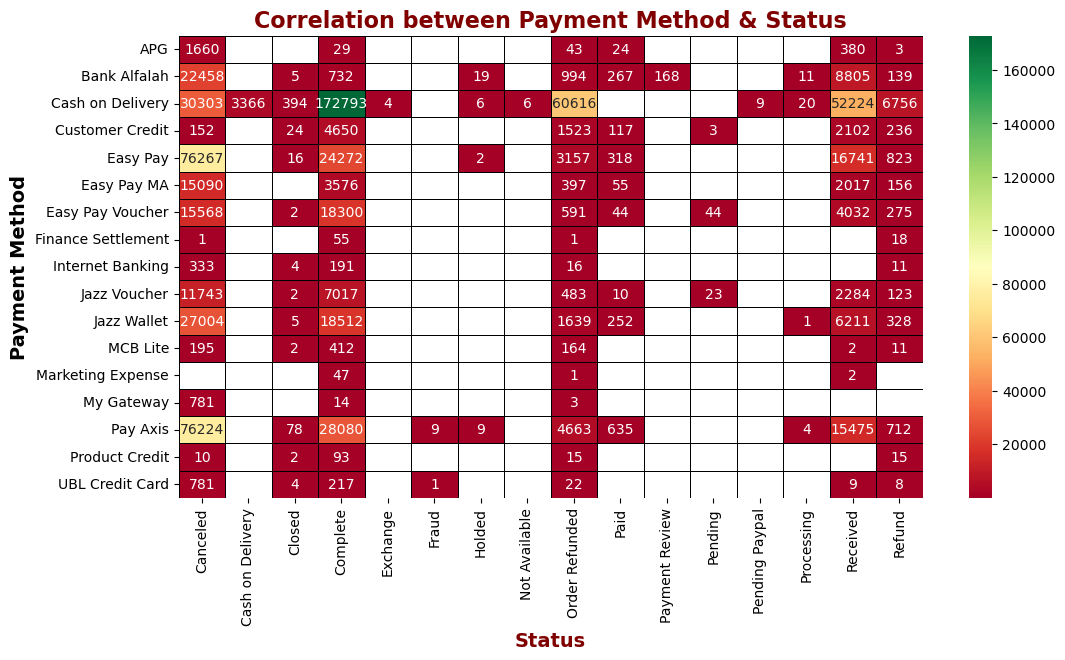

In [33]:
# Plot: Correlation between Payment Method & Status
plt.figure(figsize=(12, 6))
pivot_data = E4_pivot.drop(columns=['Total'], errors='ignore')
mask = pivot_data == 0 #hide 0 values


sns.heatmap(pivot_data, cmap='RdYlGn', annot=True, fmt='.0f', linewidths=0.5, mask=mask, linecolor='black')

#Customizing labels and titles
plt.title('Correlation between Payment Method & Status', fontsize=16, color='maroon', fontweight='bold')
plt.xlabel('Status', fontsize=14, color='maroon', fontweight='bold')
plt.ylabel('Payment Method', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

- This heatmap visualizes the correlation between payment methods and order statuses, highlighting trends in transaction volume. Notably, **Cash on Delivery (COD)** and **Easy Pay** have the highest order volumes, with COD also showing a significant number of cancellations and refunds. This suggests potential risks related to COD transactions, such as customer non-fulfillment. **Pay Axis** and **Easy Pay** also exhibit high volumes but relatively fewer issues. 
- To improve efficiency, we could incentivize prepaid methods (e.g., discounts on online payments) to reduce COD-related risks, enhance fraud detection mechanisms, and streamline payment processing for faster order completion.